In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
from fastai import *
from fastai.vision import *

In [0]:
path = Path('drive/My Drive/FastAI_BioInf/CT_Pics')

In [0]:
folderBrains = 'Brains'
fileBrains = 'urls_brains.csv'

folderHips = 'Hips'
fileHips = 'urls_hip.csv'

folderIntestines = 'Intestines'
fileIntestines = 'urls_intestines.csv'

folderLungs = 'Lungs'
fileLungs = 'urls_lungs.csv'



destBrains = path/folderBrains
destBrains.mkdir(parents=True, exist_ok=True)

destHips = path/folderHips
destHips.mkdir(parents=True, exist_ok=True)

destIntestines = path/folderIntestines
destIntestines.mkdir(parents=True, exist_ok=True)

destLungs = path/folderLungs
destLungs.mkdir(parents=True, exist_ok=True)


In [0]:
classes = ['Brains','Hips','Intestines','Lungs']

In [0]:
#download_images(path/fileBrains, destBrains, max_pics=200)
#download_images(path/fileHips, destHips, max_pics=200)
#download_images(path/fileIntestines, destIntestines, max_pics=200)
#download_images(path/fileLungs, destLungs, max_pics=200)

In [7]:
for c in classes:
    print(c)
    verify_images(path/c, delete=True, max_size=500)

Brains


Hips


Intestines


Lungs


In [0]:
np.random.seed(42)
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2,
        ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)

In [9]:
data.classes

['Brains', 'Hips', 'Intestines', 'Lungs']

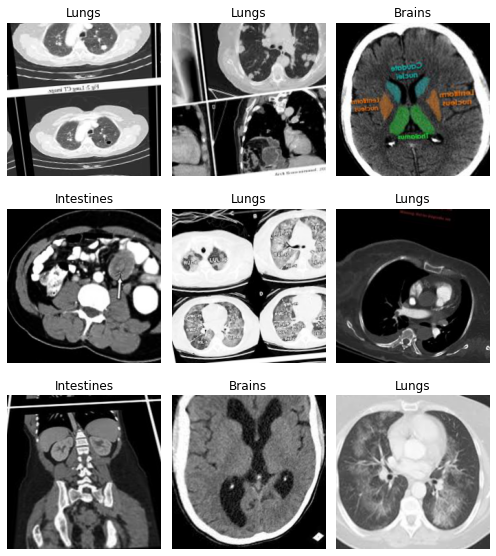

In [10]:
data.show_batch(rows=3, figsize=(7,8))

In [11]:
data.classes, data.c, len(data.train_ds), len(data.valid_ds)

(['Brains', 'Hips', 'Intestines', 'Lungs'], 4, 378, 94)

In [0]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

In [13]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,2.077044,1.505368,0.457447,00:05
1,1.402191,0.826229,0.255319,00:04
2,1.079572,0.638333,0.191489,00:04
3,0.869956,0.516669,0.180851,00:04


In [0]:
learn.save('stage-1')

In [0]:
learn.unfreeze()

In [16]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


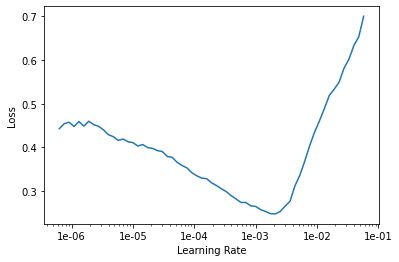

In [17]:
learn.recorder.plot()

In [22]:
learn.fit_one_cycle(3, max_lr=slice(1e-5,1e-3))

epoch,train_loss,valid_loss,error_rate,time
0,0.036709,0.425679,0.095745,00:04
1,0.029902,0.409345,0.085106,00:04
2,0.032840,0.402781,0.085106,00:04


In [0]:
learn.save('stage-2')

In [24]:
learn.load('stage-2')

Learner(data=ImageDataBunch;

Train: LabelList (378 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
Brains,Brains,Brains,Brains,Brains
Path: drive/My Drive/FastAI_BioInf/CT_Pics;

Valid: LabelList (94 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
Brains,Brains,Brains,Lungs,Intestines
Path: drive/My Drive/FastAI_BioInf/CT_Pics;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): Ba

In [25]:
interp = ClassificationInterpretation.from_learner(learn)

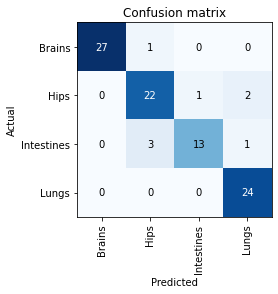

In [26]:
interp.plot_confusion_matrix()

In [0]:
learn.export()

In [0]:
defaults.device = torch.device('cpu')

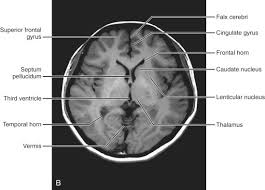

In [29]:
img = open_image(path/'Brains'/'00000041.jpg')
img

In [0]:
learn = load_learner(path)

In [33]:
pred_class,pred_idx,outputs = learn.predict(img)
pred_class

Category Brains

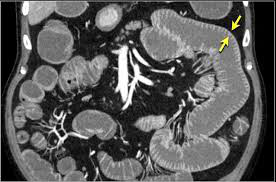

In [34]:
img = open_image(path/'Intestines'/'00000002.jpg')
img

In [0]:
learn = load_learner(path)

In [36]:
pred_class,pred_idx,outputs = learn.predict(img)
pred_class

Category Intestines

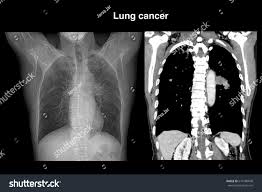

In [37]:
img = open_image(path/'Lungs'/'00000005.jpg')
img

In [0]:
learn = load_learner(path)

In [39]:
pred_class,pred_idx,outputs = learn.predict(img)
pred_class

Category Lungs